## Cross-validation
<b>Cross-validation</b>  is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/winequality-red.csv")

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [11]:
# This dataset, however, consists of only six types of quality values.
# We will thus map all quality values from 0 to 5.
q_map = sorted(list(set(df["quality"])))
print(q_map)

[3, 4, 5, 6, 7, 8]


In [13]:
quality_mapping = {}
idx = 0
for elem in q_map:
    quality_mapping[elem] = idx
    idx += 1
print(quality_mapping)

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}


<h3>iloc vs loc</h3>

- loc selects rows and columns with specific labels 
- df.loc["A"],df.loc[1]
- iloc selects rows and columns at specific integer positions
- df.iloc[1]

In [38]:
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.iloc[:]["quality"] = df.loc[:,"quality"].map(quality_mapping)

In [40]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        2  
1      9.8        2  
2      9.8        2  
3      9.8        3  
4      9.4        2

# Data Spitting
- <b> use sample with frac = 1 to shuffle the dataframe </b> <br>
 df.sample? : Return a random sample of items from an axis of object.<br>
 n : int, optional<br>
 Number of items from axis to return. Cannot be used with `frac`.<br>
 Default = 1 if `frac` = None.<br>
 frac : float, optional<br>
 Fraction of axis items to return. Cannot be used with `n`<br>
 <b>Returns</b><br>
 Series or DataFrame<br>
    A new object of same type as caller containing `n` items randomly
    sampled from the caller object.<br>
Note : If `frac` > 1, `replacement` should be set to `True`.

In [54]:
# use sample with frac = 1to shuffle the dataframe
# we reset the indices since they change after shuffling the dataframe
df = df.sample(frac = 1).reset_index(drop = True)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               9.4              0.33         0.59             2.8      0.079   
1              11.1              0.39         0.54             2.7      0.095   
2              10.2              0.54         0.37            15.4      0.214   
3              11.5              0.59         0.59             2.6      0.087   
4               9.9              0.35         0.38             1.5      0.058   
...             ...               ...          ...             ...        ...   
1594            7.3              0.55         0.01             1.8      0.093   
1595            6.0              0.51         0.00             2.1      0.064   
1596            9.0              0.62         0.04             1.9      0.146   
1597            6.9              0.41         0.33             2.2      0.081   
1598            7.4              0.60         0.26             2.1      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                     9.0                  30.0  0.99760  3.12       0.54   
1                    21.0                 101.0  1.00010  3.13       0.51   
2                    55.0                  95.0  1.00369  3.18       0.77   
3                    13.0                  49.0  0.99880  3.18       0.65   
4                    31.0                  47.0  0.99676  3.26       0.82   
...                   ...                   ...      ...   ...        ...   
1594                  9.0                  15.0  0.99514  3.35       0.58   
1595                 40.0                  54.0  0.99500  3.54       0.93   
1596                 27.0                  90.0  0.99840  3.16       0.70   
1597                 22.0                  36.0  0.99490  3.41       0.75   
1598                 17.0                  91.0  0.99616  3.29       0.56   

      alcohol  quality  
0        12.0        3  
1         9.5        2  
2         9.0        3  
3        11.0        3  
4        10.6        4  
...       ...      ...  
1594     11.0        4  
1595     10.7        3  
1596      9.4        2  
1597     11.1        3  
1598      9.8        3  

[1599 rows x 12 columns]

In [55]:
# top 1000 rows are selected for training
df_train = df.head(1000)
# bottom 599 values are selected for testing/validation
df_test = df.tail(599)

In [73]:
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth = 3)
# choose the columns you want to train on, these are the features for the model
cols = list(df.columns)[:-1]

# train the model on the provided features and append mapped quality from before
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [77]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictinos = clf.predict(df_test[cols])

# calicate the accuracy of predictions on training set
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)

# calucate the accuracy of predictions on test data sets
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictinos)

In [79]:
train_accuracy,test_accuracy

(0.58, 0.5659432387312187)

#### note : 
    %matplotlib inline is only necessary to register this function so that it displays in the output. Running import matplotlib. 
    pyplot as plt also registers this same function, so as of now it's not necessary to even use %matplotlib inline if you use pyplot or a library that imports pyplot like pandas or seaborn.

In [95]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# set global size of label text on the plots
matplotlib.rc("xtick",labelsize=20)
matplotlib.rc("ytick",labelsize=20)

# this line ensures that the plot is diaplayed inside the nnotebook
%matplotlib inline

# initialize lists to store accuracies for training and test data 
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1,25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # cols/features for training
    # note this can be done outside the loop also
    cols = list(df.columns)[:-1]
    
    # fit the model on given features
    clf.fit(df_train[cols],df_train.quality)
    
    # create the train and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calucate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

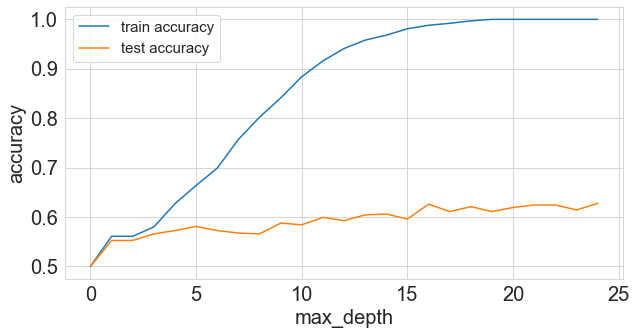

In [106]:
# create 2 plots using matlplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train accuracy")
plt.plot(test_accuracies,label = "test accuracy")
plt.legend(loc = "upper left",prop={"size":15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()

# Types of Crosss Validation
- k-fold cross-validation
- stratified k-fold cross-validation
- hold-out based validation
- leave-one-out cross-validation
- group k-fold cross-validation

# k-fold cross-validation
- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores
<img src ="images/k-fold-cv.png" style = "width:50%"/> 

In [4]:
from sklearn.model_selection import KFold

import numpy as np

data=np.array([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
kfold=KFold(5,True)
# prin
for train,test in kfold.split(data):
    print("Train: %s,Test: %s" %(data[train],data[test]))

Train: [  5  10  15  20  30  35  40  45  50  60  65  70  75  85  95 100],Test: [25 55 80 90]
Train: [ 10  15  20  25  30  40  55  60  65  70  75  80  85  90  95 100],Test: [ 5 35 45 50]
Train: [  5  20  25  30  35  40  45  50  55  60  65  80  85  90  95 100],Test: [10 15 70 75]
Train: [ 5 10 15 20 25 30 35 45 50 55 60 65 70 75 80 90],Test: [ 40  85  95 100]
Train: [  5  10  15  25  35  40  45  50  55  70  75  80  85  90  95 100],Test: [20 30 60 65]


/Users/kushidhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [7]:
l = kfold.split(data)

In [9]:
list(l)

[(array([ 0,  1,  2,  3,  4,  6,  8,  9, 10, 12, 13, 14, 16, 17, 18, 19]),
  array([ 5,  7, 11, 15])),
 (array([ 1,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 15, 16, 17, 18, 19]),
  array([ 0,  8,  9, 14])),
 (array([ 0,  2,  3,  4,  5,  7,  8,  9, 11, 13, 14, 15, 16, 17, 18, 19]),
  array([ 1,  6, 10, 12])),
 (array([ 0,  1,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18]),
  array([ 2,  4, 16, 19])),
 (array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19]),
  array([ 3, 13, 17, 18]))]

In [38]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    
    # Training data is in a CSV file called train.csv 
    df = pd.read_csv("datasets/winequality-red.csv")
    
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        
        df.loc[val_, 'kfold'] = fold

    # save the new csv with kfold column
    df.to_csv("datasets/train_folds.csv", index=False)

In [40]:
# DocString : help? 

In [41]:
df_ = pd.read_csv("datasets/train_folds.csv")
df_

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.1             0.350         0.29             2.5      0.096   
1              10.5             0.260         0.47             1.9      0.078   
2               7.8             0.815         0.01             2.6      0.074   
3               8.0             0.620         0.35             2.8      0.086   
4               7.3             0.835         0.03             2.1      0.092   
...             ...               ...          ...             ...        ...   
1594            8.2             0.700         0.23             2.0      0.099   
1595            9.9             0.320         0.56             2.0      0.073   
1596           10.0             0.490         0.20            11.0      0.071   
1597           11.4             0.360         0.69             2.1      0.090   
1598           10.2             0.290         0.65             2.4      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    20.0                  53.0  0.99620  3.42       0.65   
1                     6.0                  24.0  0.99760  3.18       1.04   
2                    48.0                  90.0  0.99621  3.38       0.62   
3                    28.0                  52.0  0.99700  3.31       0.62   
4                    10.0                  19.0  0.99660  3.39       0.47   
...                   ...                   ...      ...   ...        ...   
1594                 14.0                  81.0  0.99730  3.19       0.70   
1595                  3.0                   8.0  0.99534  3.15       0.73   
1596                 13.0                  50.0  1.00150  3.16       0.69   
1597                  6.0                  21.0  1.00000  3.17       0.62   
1598                  6.0                  17.0  0.99565  3.22       0.63   

      alcohol  quality  kfold  
0        11.0        6      0  
1        10.9        7      0  
2        10.8        5      0  
3        10.8        5      0  
4         9.6        5      0  
...       ...      ...    ...  
1594      9.4        5      4  
1595     11.4        6      4  
1596      9.2        6      4  
1597      9.2        6      4  
1598     11.8        6      4  

[1599 rows x 13 columns]

# stratified k-fold.
- If you have a skewed dataset for binary classification with 90% positive samples and only 10% negative samples, you don't want to use random k-fold cross-validation.Using simple k-fold cross-validation for a dataset like this can result in folds with all negative samples.
- In these cases, we prefer using stratified k-fold cross-validation.
- Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. 
- So, in each fold, you will have the same 90% positive and 10% negative samples. 
- Thus, whatever metric you choose to evaluate, it will give similar results across all folds.

**The rule is simple. If it’s a standard classification problem, choose stratified k-fold blindly.**

In [46]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
    # Training data is in a csv file called train.csv 
    df = pd.read_csv("datasets/winequality-red.csv")
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True) # fetch targets
    y = df.quality.values
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    # fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f
    # save the new csv with kfold column
    df.to_csv("datasets/strafied_train_folds.csv", index=False)

# Hold-out based validation.
- We use this kind of cross-validation when we have a large amount of data and model inference is a time-consuming process.

Hold-out is also used very frequently with time-series data. Let’s assume the problem we are provided with is predicting sales of a store for 2020, and you are provided all the data from 2015-2019. In this case, you can select all the data for 2019 as a hold-out and train your model on all the data from 2015 to 2018.

Note:
    In many cases, we have to deal with small datasets and creating big validation sets means losing a lot of data for the model to learn. In those cases, we can opt for a type of k-fold cross-validation where k=N, where N is the number of samples in the dataset. This means that in all folds of training, we will be training on all data samples except 1. The number of folds for this type of cross-validation is the same as the number of samples that we have in the dataset.
One should note that this type of cross-validation can be costly in terms of the time it takes if the model is not fast enough, but since it’s only preferable to use this cross-validation for small datasets, it doesn’t matter much.

# For Regression.
- The good thing about regression problems is that we can use all the cross-validation techniques mentioned above for regression problems **except for stratified k-fold.** 
- To use stratified k-fold for a regression problem, we have first to divide the target into bins, and then we can use stratified k-fold in the same way as for classification problems.
- There are several choices for selecting the appropriate number of bins. If you have a lot of samples( > 10k, > 100k), then you don’t need to care about the number of bins. Just divide the data into 10 or 20 bins. 
-  If you do not have a lot of samples, you can use a simple rule like Sturge’s Rule to calculate the appropriate number of bins.

**Sturge’s rule:**<br>
**Number of Bins = 1 + log2(N)**<br>
Where N is the number of samples you have in your dataset. 
 <img src = "images/Sturge.png" style = "width :50%"/>

In [49]:
# stratified-kfold for regression
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

In [57]:
def create_folds(data):
    # we create a new column called kfold and fill it with -1 data["kfold"] = -1
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    # calculate the number of bins by Sturge's rule 
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
    # bin targets
    data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
    # drop the bins column
    data = data.drop("bins", axis=1) # return dataframe with folds 
#     print(data)
    return data
if __name__ == "__main__":
# we create a sample dataset with 15000 samples # and 100 features and 1 target
    X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1 )
    # create a dataframe out of our numpy arrays
    df = pd.DataFrame(X,columns=[f"f_{i}" for i in range(X.shape[1])])
    df.loc[:,"target"] = y
    # create folds
    df = create_folds(df)

/Users/kushidhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [61]:
import matplotlib.pyplot as plt

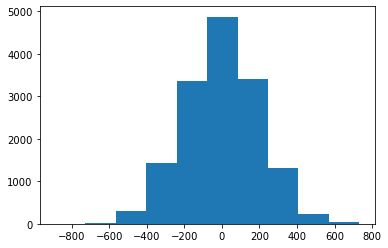

In [68]:
plt.hist(df["target"])
plt.show()

- The types of cross-validation presented in this chapter can be applied to almost any machine learning problem.

- Still, you must **keep in mind that cross-validation also depends a lot on the data and you might need to adopt new forms of cross-validation depending on your problem and data.**
- For example, let’s say we have a problem in which we would like to build a model to detect skin cancer from skin images of patients. Our task is to build a binary classifier which takes an input image and predicts the probability for it being benign or malignant.
- In these kinds of datasets, you might have multiple images for the same patient in the training dataset.
- So, to build a good cross-validation system here, you must have stratified k-folds, but you must also make sure that **patients in training data do not appear in validation data.**
- Fortunately, scikit-learn offers a type of cross-validation known as **GroupKFold**. Here the patients can be considered as groups. 
- But **unfortunately**, there is **no way to combine GroupKFold with StratifiedKFold in scikit-learn**. So you need to do that yourself. I’ll leave it as an exercise for the reader.